# 1. Import data and check null values, check column info and the descriptive statistics of the data.

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('tips.csv')
data.isnull().sum()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# 2. Have a look at the tips given to the waiters according to the total bill paid, number of people at a table, and the day of the week.

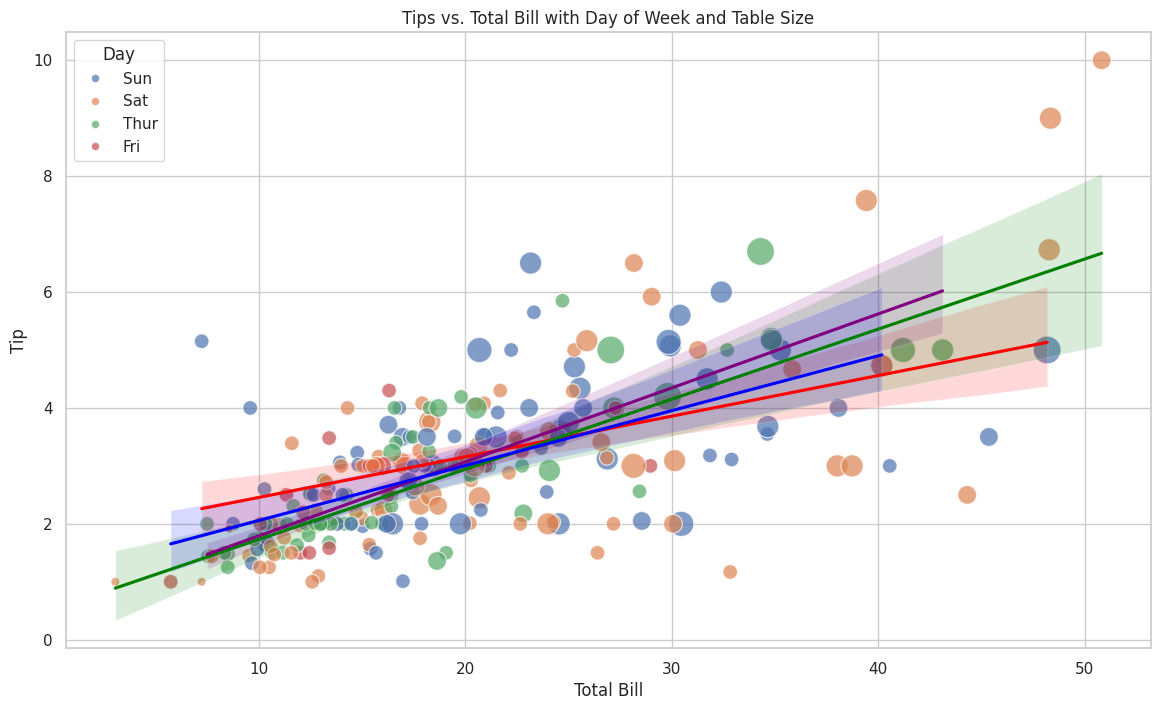

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='total_bill', y='tip', hue='day', size='size', sizes=(40, 400), alpha=0.7, palette='deep')

sns.regplot(data=data[data['day'] == 'Sun'], x='total_bill', y='tip', scatter=False, color='red')
sns.regplot(data=data[data['day'] == 'Sat'], x='total_bill', y='tip', scatter=False, color='green')
sns.regplot(data=data[data['day'] == 'Thur'], x='total_bill', y='tip', scatter=False, color='purple')
sns.regplot(data=data[data['day'] == 'Fri'], x='total_bill', y='tip', scatter=False, color='blue')

plt.title('Tips vs. Total Bill with Day of Week and Table Size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Sun', 'Sat', 'Thur', 'Fri']
new_handles = [handle for handle, label in zip(handles, labels) if label in new_labels]

plt.legend(new_handles, new_labels, title='Day')

plt.show()


# 3. Have a look at the tips given to the waiters according to the total bill paid, the number of people at a table, and the gender of the person paying the bill.

sex
Male      157
Female     87
Name: count, dtype: int64


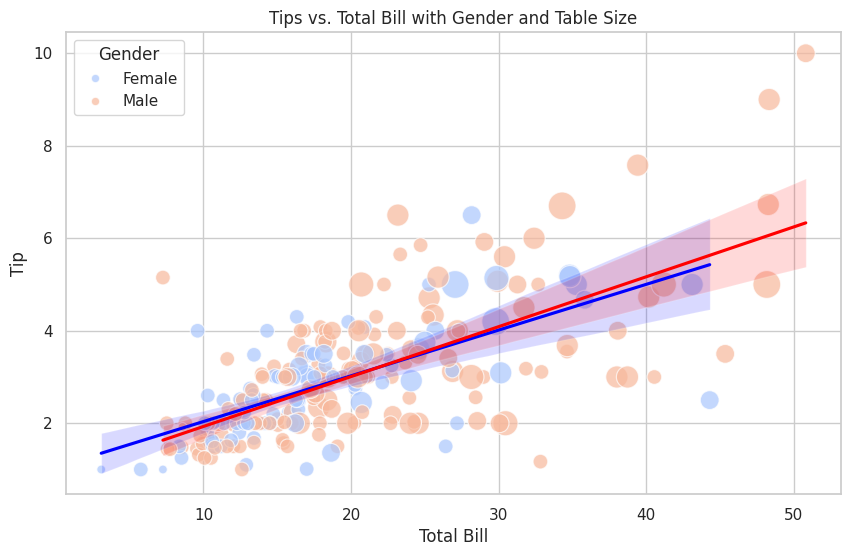

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

if data['sex'].dtype != 'object':
    data['sex'] = data['sex'].map({0: 'Female', 1: 'Male'})  # Adjust this mapping based on your data if needed

print(data['sex'].value_counts())

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_bill', y='tip', hue='sex', size='size', sizes=(40, 400), alpha=0.7, palette='coolwarm')

sns.regplot(data=data[data['sex'] == 'Female'], x='total_bill', y='tip', scatter=False, color='blue')
sns.regplot(data=data[data['sex'] == 'Male'], x='total_bill', y='tip', scatter=False, color='red')

plt.title('Tips vs. Total Bill with Gender and Table Size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Female', 'Male']
new_handles = [handle for handle, label in zip(handles, labels) if label in new_labels]

plt.legend(new_handles, new_labels, title='Gender')

plt.show()


# 4. Have a look at the tips given to the waiters according to the total bill paid, the number of people at a table, and the time of the meal.

time
Dinner    176
Lunch      68
Name: count, dtype: int64


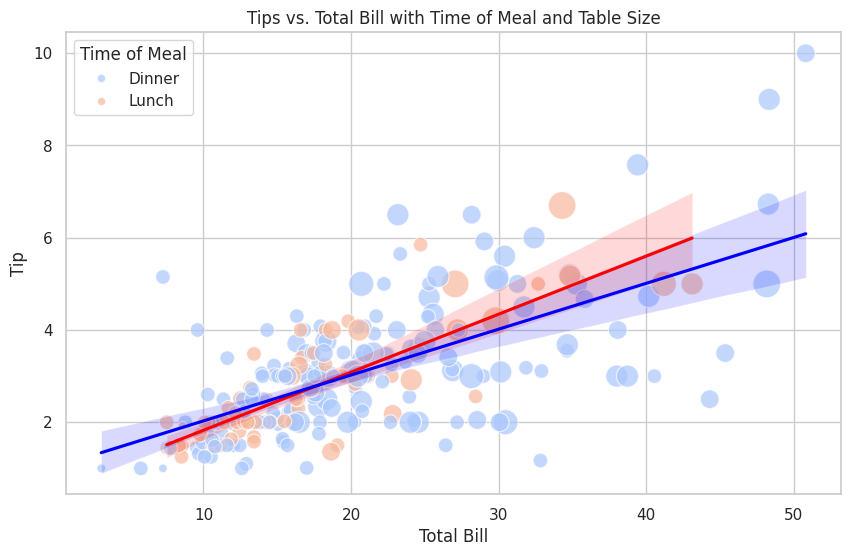

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

if data['time'].dtype != 'object':
    data['time'] = data['time'].map({0: 'Lunch', 1: 'Dinner'})

print(data['time'].value_counts())

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_bill', y='tip', hue='time', size='size', sizes=(40, 400), alpha=0.7, palette='coolwarm')

sns.regplot(data=data[data['time'] == 'Lunch'], x='total_bill', y='tip', scatter=False, color='red')
sns.regplot(data=data[data['time'] == 'Dinner'], x='total_bill', y='tip', scatter=False, color='blue')

plt.title('Tips vs. Total Bill with Time of Meal and Table Size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Dinner', 'Lunch']
new_handles = [handle for handle, label in zip(handles, labels) if label in new_labels]

plt.legend(new_handles, new_labels, title='Time of Meal')

plt.show()


# 5. Now check the tips given to the waiters according to the days to find out which day the most tips are given to the waiters.

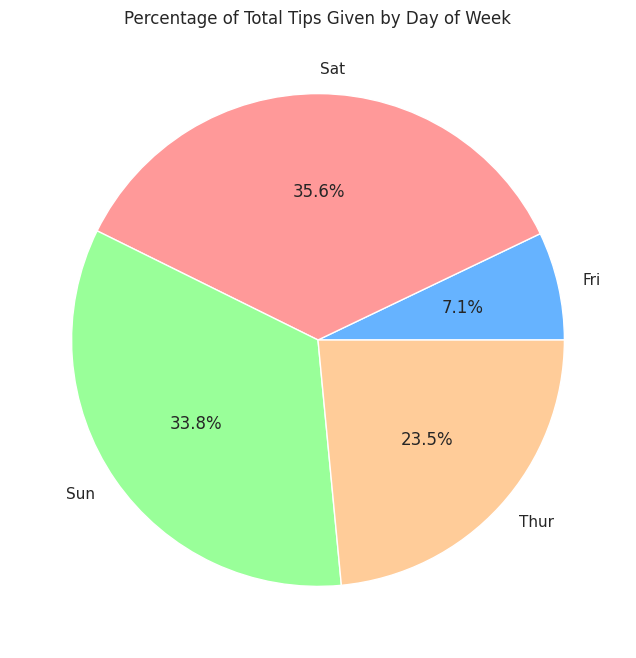

In [39]:
day_tip_sum = data.groupby('day')['tip'].sum()

plt.figure(figsize=(8, 8))
plt.pie(day_tip_sum, labels=day_tip_sum.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99','#ffcc99'])
plt.title('Percentage of Total Tips Given by Day of Week')
plt.show()


# 6. Look at the number of tips given to waiters by gender of the person paying the bill to see who tips waiters the most.

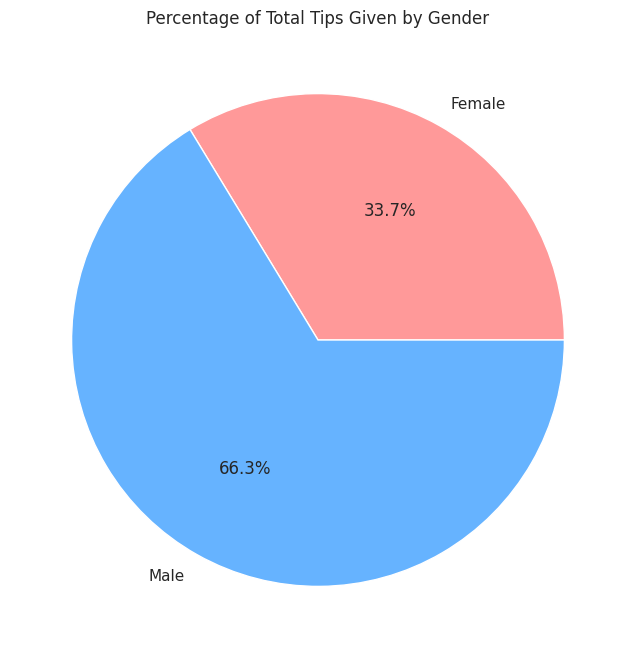

In [38]:
import matplotlib.pyplot as plt

gender_tip_sum = data.groupby('sex')['tip'].sum()

plt.figure(figsize=(8, 8))
plt.pie(gender_tip_sum, labels=gender_tip_sum.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Percentage of Total Tips Given by Gender')
plt.show()


# 7. Now check the tips given to the waiters according to the days to find out which day the most tips are given to the waiters.

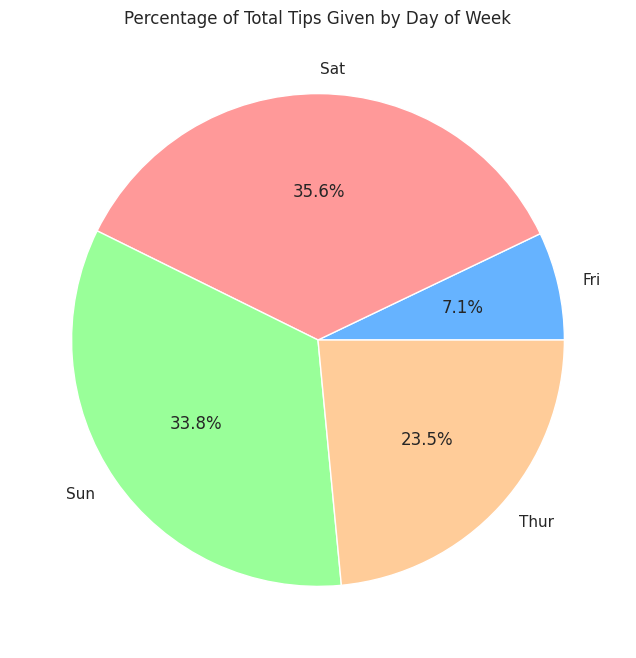

In [42]:
#Already done in q5

day_tip_sum = data.groupby('day')['tip'].sum()

plt.figure(figsize=(8, 8))
plt.pie(day_tip_sum, labels=day_tip_sum.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99','#ffcc99'])
plt.title('Percentage of Total Tips Given by Day of Week')
plt.show()


# 8. Let’s see if a smoker tips more or a non-smoker.

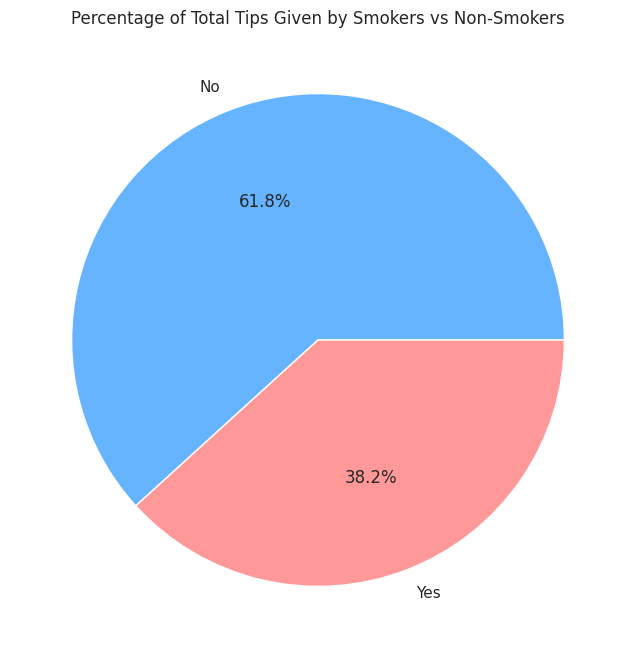

In [44]:
smoker_tip_sum = data.groupby('smoker')['tip'].sum()

plt.figure(figsize=(8, 8))
plt.pie(smoker_tip_sum, labels=smoker_tip_sum.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Percentage of Total Tips Given by Smokers vs Non-Smokers')
plt.show()


# 9. Now let’s see if most tips are given during lunch or dinner.

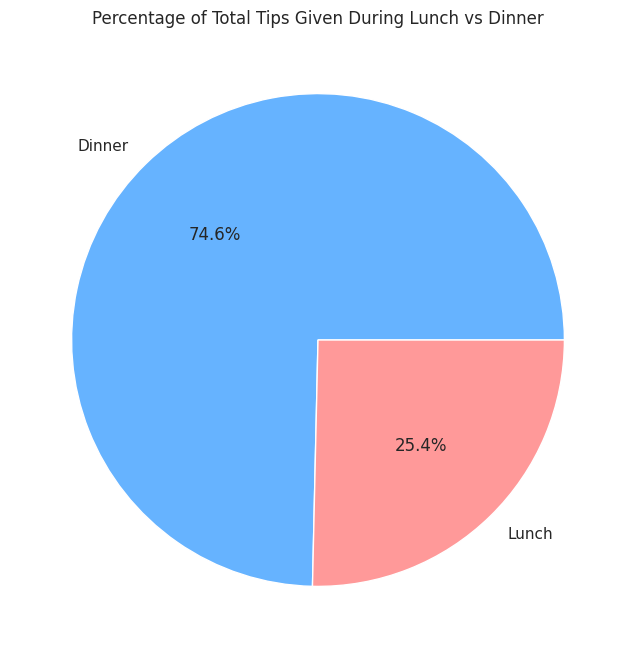

In [45]:
time_tip_sum = data.groupby('time')['tip'].sum()

plt.figure(figsize=(8, 8))
plt.pie(time_tip_sum, labels=time_tip_sum.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Percentage of Total Tips Given During Lunch vs Dinner')
plt.show()


# 10. Before training a waiter tips prediction model, do some data transformation by transforming the categorical values into numerical values.

In [64]:
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})
data['smoker'] = data['smoker'].map({'Yes': 1, 'No': 0})
data['day'] = data['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
data['time'] = data['time'].map({'Lunch': 0, 'Dinner': 1})


# 11. Now split the data into training and test sets. Then train a machine learning model (Linear Regression) for the task of waiter tips prediction.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = data['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# 12. Check model prediction

In [69]:
input_df = pd.DataFrame([[24.50, 1, 0, 0, 1, 4]], columns=['total_bill', 'sex', 'smoker', 'day', 'time', 'size'])
predicted_tip = model.predict(input_df)
print(predicted_tip)


[3.73742609]
